In [1]:
import py3Dmol as p3d
import veloxchem as vlx
import matplotlib.pyplot as plt
import numpy as np
from valet import transition_analysis_utils as tau

In [2]:
ethene_xyz = """6

C        0.67759997    0.00000000    0.00000000
C       -0.67759997    0.00000000    0.00000000
H        1.21655197    0.92414474    0.00000000
H        1.21655197   -0.92414474    0.00000000
H       -1.21655197   -0.92414474    0.00000000
H       -1.21655197    0.92414474    0.00000000
"""

In [3]:
viewer = p3d.view(width=400, height=300)
viewer.addModel(ethene_xyz)
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
viewer.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [4]:
molecule = vlx.Molecule.from_xyz_string(ethene_xyz)
basis = vlx.MolecularBasis.read(molecule, "6-31G")

scf_drv = vlx.ScfRestrictedDriver()
scf_results = scf_drv.compute(molecule, basis)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -78.002642751764 a.u. Time: 0.10 sec.                                  
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -78.002642754877    0.0000000000      0.00003567      0.00000803      0.00000000                


                  2       -78.002642755176   -0.0000000003      0.00001162      0.00000253      0.00002363                


                  3       -78.002642755198   -0.0000000000      0.00000124      0.00000031      0.00000434                


                  4       -78.002642755199   -0.0000000000      0.00000009      0.00000002      0.00000144                


                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.10 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :      -78.0026427552 a.u.                                              
               Electronic Energy                  :     -111.3112763612 a.u.                                              
               Nuclear Repulsion Energy           :       33.3086336060 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000897 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

In [5]:
mo_energy = scf_results["E_alpha"]
nocc = molecule.number_of_alpha_electrons()
norb = mo_energy.shape[0]
nvirt = norb - nocc

print("Number of orbitals:", len(mo_energy))
print("Number of occupied orbitals:", nocc)
print("Number of virtual orbitals:", nvirt)
print("\nMO energies (au):\n", mo_energy)

print(f"\nHOMO-LUMO gap (eV): {27.2114*(mo_energy[nocc] - mo_energy[nocc-1]):.3f}")

Number of orbitals: 26
Number of occupied orbitals: 8
Number of virtual orbitals: 18

MO energies (au):
 [-11.2318428  -11.23036306  -1.03031426  -0.79297209  -0.64755459
  -0.57527959  -0.51027799  -0.3664635    0.17010963   0.26253257
   0.29520837   0.31109777   0.38857996   0.47929591   0.68491581
   0.78814557   0.78870971   0.8870793    0.89030532   0.97978752
   1.15705815   1.20987525   1.2392286    1.2517033    1.36026403
   1.54571226]

HOMO-LUMO gap (eV): 14.601


In [6]:
viewer = vlx.OrbitalViewer()
viewer.plot(molecule, basis, scf_drv.mol_orbs)

Output()

Dropdown(description='Orbital:', index=7, options=(('  1 occ=2.000 ene=-11.232  (alpha HOMO-7)', 0), ('  2 occ…

In [7]:
lres_drv = vlx.LinearResponseEigenSolver()
rsp_settings = {"nstates": 12}
lres_drv.update_settings(rsp_settings)
lres_out = lres_drv.compute(molecule, basis, scf_results)

                                                                                                                          
                                            Linear Response EigenSolver Setup                                             
                                                                                                                          
                               Number of States                : 12                                                       
                               Max. Number of Iterations       : 150                                                      
                               Convergence Threshold           : 1.0e-04                                                  
                               ERI Screening Threshold         : 1.0e-12                                                  
                                                                                                                          


* Info * Processing 12 Fock builds...                                                                                     


                                                                                                                          
* Info * 12 gerade trial vectors in reduced space                                                                         
* Info * 12 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 84.49 kB of memory used for subspace procedure on the master node                                                
* Info * 2.32 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   1 * Residuals (Max,Min): 5.34e-01 and 1.30e-01                                            
                

* Info * Processing 12 Fock builds...                                                                                     


                                                                                                                          
* Info * 24 gerade trial vectors in reduced space                                                                         
* Info * 24 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 139.78 kB of memory used for subspace procedure on the master node                                               
* Info * 2.32 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   2 * Residuals (Max,Min): 9.81e-02 and 7.00e-03                                            
                

* Info * Processing 12 Fock builds...                                                                                     


                                                                                                                          
* Info * 36 gerade trial vectors in reduced space                                                                         
* Info * 36 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 194.96 kB of memory used for subspace procedure on the master node                                               
* Info * 2.32 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   3 * Residuals (Max,Min): 3.10e-02 and 3.22e-15                                            
                

* Info * Processing 8 Fock builds...                                                                                      


                                                                                                                          
* Info * 44 gerade trial vectors in reduced space                                                                         
* Info * 44 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 231.82 kB of memory used for subspace procedure on the master node                                               
* Info * 2.32 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   4 * Residuals (Max,Min): 2.04e-01 and 2.98e-15                                            
                

* Info * Processing 8 Fock builds...                                                                                      


                                                                                                                          
* Info * 52 gerade trial vectors in reduced space                                                                         
* Info * 52 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 268.82 kB of memory used for subspace procedure on the master node                                               
* Info * 2.32 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   5 * Residuals (Max,Min): 1.19e-02 and 1.99e-15                                            
                

* Info * Processing 6 Fock builds...                                                                                      


                                                                                                                          
* Info * 58 gerade trial vectors in reduced space                                                                         
* Info * 58 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 296.34 kB of memory used for subspace procedure on the master node                                               
* Info * 2.32 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   6 * Residuals (Max,Min): 8.77e-03 and 2.43e-15                                            
                

* Info * Processing 4 Fock builds...                                                                                      


                                                                                                                          
* Info * 61 gerade trial vectors in reduced space                                                                         
* Info * 62 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 312.46 kB of memory used for subspace procedure on the master node                                               
* Info * 2.32 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   7 * Residuals (Max,Min): 3.57e-03 and 2.90e-15                                            
                

* Info * Processing 2 Fock builds...                                                                                      


                                                                                                                          
* Info * 63 gerade trial vectors in reduced space                                                                         
* Info * 64 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 321.96 kB of memory used for subspace procedure on the master node                                               
* Info * 2.32 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   8 * Residuals (Max,Min): 6.62e-04 and 3.26e-15                                            
                

* Info * Processing 1 Fock build...                                                                                       


                                                                                                                          
* Info * 64 gerade trial vectors in reduced space                                                                         
* Info * 65 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 326.41 kB of memory used for subspace procedure on the master node                                               
* Info * 2.31 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   9 * Residuals (Max,Min): 9.91e-05 and 3.10e-15                                            
                

               *** Linear response converged in 9 iterations. Time: 1.26 sec                                              
                                                                                                                          
                                                                                                                          


               Electric Transition Dipole Moments (dipole length, a.u.)                                                   
               --------------------------------------------------------                                                   
                                                X            Y            Z                                               
               Excited State    S1:      1.531507     0.000000     0.000000                                               
               Excited State    S2:      0.000000     0.000000    -0.000000                                               
               Excited State    S3:      0.000000     0.000000    -0.000000                                               
               Excited State    S4:      0.000000     0.000000    -0.021744                                               
               Excited State    S5:     -0.000000     0.000000     0.000000                                               
               E

               Electric Transition Dipole Moments (dipole velocity, a.u.)                                                 
               ----------------------------------------------------------                                                 
                                                X            Y            Z                                               
               Excited State    S1:      1.297594     0.000000     0.000000                                               
               Excited State    S2:      0.000000     0.000000    -0.000000                                               
               Excited State    S3:      0.000000     0.000000    -0.000000                                               
               Excited State    S4:      0.000000    -0.000000    -0.146990                                               
               Excited State    S5:      0.000000    -0.000000     0.000000                                               
               E

               Magnetic Transition Dipole Moments (a.u.)                                                                  
               -----------------------------------------                                                                  
                                                X            Y            Z                                               
               Excited State    S1:     -0.000000     0.000000     0.000000                                               
               Excited State    S2:      0.698660     0.000000     0.000000                                               
               Excited State    S3:      0.000000    -0.891977    -0.000000                                               
               Excited State    S4:     -0.000000     0.000000    -0.000000                                               
               Excited State    S5:     -0.008988    -0.000000     0.000000                                               
               E

               One-Photon Absorption                                                                                      
               ---------------------                                                                                      
               Excited State    S1:      0.29153356 a.u.      7.93303 eV    Osc.Str.    0.4559                            
               Excited State    S2:      0.35199506 a.u.      9.57827 eV    Osc.Str.    0.0000                            
               Excited State    S3:      0.36380664 a.u.      9.89968 eV    Osc.Str.    0.0000                            
               Excited State    S4:      0.36860999 a.u.     10.03039 eV    Osc.Str.    0.0001                            
               Excited State    S5:      0.38443182 a.u.     10.46092 eV    Osc.Str.    0.0000                            
               Excited State    S6:      0.42735114 a.u.     11.62882 eV    Osc.Str.    0.0000                            
               E

               Electronic Circular Dichroism                                                                              
               -----------------------------                                                                              
               Excited State    S1:     Rot.Str.     -0.000000 a.u.    -0.0000 [10**(-40) cgs]                            
               Excited State    S2:     Rot.Str.      0.000000 a.u.     0.0000 [10**(-40) cgs]                            
               Excited State    S3:     Rot.Str.     -0.000000 a.u.    -0.0000 [10**(-40) cgs]                            
               Excited State    S4:     Rot.Str.      0.000000 a.u.     0.0000 [10**(-40) cgs]                            
               Excited State    S5:     Rot.Str.     -0.000000 a.u.    -0.0000 [10**(-40) cgs]                            
               Excited State    S6:     Rot.Str.      0.000000 a.u.     0.0000 [10**(-40) cgs]                            
               E

               Character of excitations:                                                                                  
                                                                                                                          
               Excited state 1                                                                                            
               ---------------                                                                                            
               HOMO     -> LUMO         0.9893                                                                            
                                                                                                                          
               Excited state 2                                                                                            
               ---------------                                                                                            
               H

In [8]:
lres_out.keys()

dict_keys(['eigenvalues', 'eigenvectors_distributed', 'electric_transition_dipoles', 'velocity_transition_dipoles', 'magnetic_transition_dipoles', 'oscillator_strengths', 'rotatory_strengths', 'excitation_details', 'number_of_states'])

In [9]:
def print_table(lres):
    print("State Energy [eV]  Osc. str.   TM(x)     TM(y)     TM(z)")
    for i in np.arange(len(lres["eigenvalues"])):
        e, os, x, y, z = (
            27.2114 * lres["eigenvalues"][i],
            lres["oscillator_strengths"][i],
            lres["electric_transition_dipoles"][i][0],
            lres["electric_transition_dipoles"][i][1],
            lres["electric_transition_dipoles"][i][2],
        )
        print(f" {i:2}     {e:.3f}     {os:8.5f}  {x:8.5f}  {y:8.5f}  {z:8.5f}")

print_table(lres_out)

State Energy [eV]  Osc. str.   TM(x)     TM(y)     TM(z)
  0     7.933      0.45586   1.53151   0.00000   0.00000
  1     9.578      0.00000   0.00000   0.00000  -0.00000
  2     9.900      0.00000   0.00000   0.00000  -0.00000
  3     10.030      0.00012   0.00000   0.00000  -0.02174
  4     10.461      0.00000  -0.00000   0.00000   0.00000
  5     11.629      0.00000   0.00000  -0.00000  -0.00000
  6     12.858      0.00000  -0.00000  -0.00000   0.00000
  7     13.538      0.00000   0.00000   0.00000   0.00000
  8     13.589      0.00000   0.00000   0.00000  -0.00000
  9     14.819      0.00000   0.00000   0.00000  -0.00000
 10     14.919      0.72579  -1.40916   0.00000   0.00000
 11     15.052      1.11817  -0.00000  -1.74133   0.00000


In [10]:
lres_drv = vlx.LinearResponseEigenSolver()
E2 = lres_drv.get_e2(molecule, basis, scf_results)

* Info * Processing 288 Fock builds...                                                                                    


In [11]:
n = nocc * nvirt
print("Dimension of full Hessian:", 2 * n)

Dimension of full Hessian: 288


In [12]:
print(E2.shape)

(288, 288)


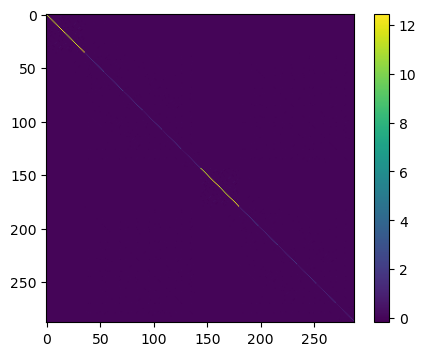

In [13]:
plt.figure(figsize=(5, 4))
plt.imshow(E2)
plt.colorbar()
plt.show()

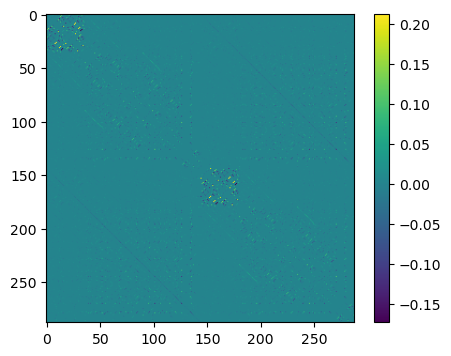

In [14]:
plt.figure(figsize=(5, 4))
plt.imshow(np.array(E2) - np.array(E2)*np.identity(2 * n))
plt.colorbar()
plt.show()

In [15]:
idx = (nocc - 1) * nvirt # index position for (pi,pi*) excitation
print(f'Diagonal element for the (pi,pi*)-excitation: {E2[idx,idx] : .6f} a.u.')

Diagonal element for the (pi,pi*)-excitation:  0.361149 a.u.


In [16]:
# Orbital energies
orbital_energies = scf_results['E_alpha']

# ERI integrals in physicist's notation
moints_drv = vlx.MOIntegralsDriver()
isis = moints_drv.compute_in_memory(molecule, basis, scf_drv.mol_orbs, "phys_OVOV")
iiss = moints_drv.compute_in_memory(molecule, basis, scf_drv.mol_orbs, "phys_OOVV")

# Determine the specific diagonal matrix element of E[2] explicitly 
diag_element = orbital_energies[nocc] - orbital_energies[nocc - 1] +(- isis[nocc - 1,0,nocc - 1,0] + 2 * iiss[nocc - 1,nocc - 1,0,0])
print(f'Diagonal element (explicit calculation): {diag_element : .6f}  a.u.')

Diagonal element (explicit calculation):  0.361149  a.u.


In [17]:
S2 = np.identity(2 * n)
S2[n:, n:] *= -1

In [18]:
lrs_drv = vlx.LinearResponseSolver()

mu_x = lrs_drv.get_prop_grad("electric dipole", "x", molecule, basis, scf_results)[0]
mu_y = lrs_drv.get_prop_grad("electric dipole", "y", molecule, basis, scf_results)[0]
mu_z = lrs_drv.get_prop_grad("electric dipole", "z", molecule, basis, scf_results)[0]

V1x = -mu_x
V1y = -mu_y
V1z = -mu_z

print("Dimension of V[1] vectors:", V1x.shape[0])

Dimension of V[1] vectors: 288


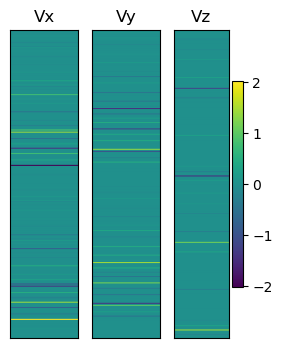

In [19]:
plt.figure(figsize=(3, 4))
Vmtrx = np.zeros((2 * n, 100))
plt.subplot(131)
plt.title("Vx")
for i in np.arange(100):
    Vmtrx[:, i] = V1x
plt.imshow(
    Vmtrx, vmin=np.min([V1x, V1y, V1z]), vmax=np.max([V1x, V1y, V1z]), aspect="auto"
)
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.title("Vy")
for i in np.arange(100):
    Vmtrx[:, i] = V1y
plt.imshow(
    Vmtrx, vmin=np.min([V1x, V1y, V1z]), vmax=np.max([V1x, V1y, V1z]), aspect="auto"
)
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.title("Vz")
for i in np.arange(100):
    Vmtrx[:, i] = V1z
plt.imshow(
    Vmtrx, vmin=np.min([V1x, V1y, V1z]), vmax=np.max([V1x, V1y, V1z]), aspect="auto"
)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

In [20]:
lrs_drv = vlx.LinearResponseSolver()

print('Elements for (pi,pi*)-excitation:')
print(f'(upper)   g: {V1x[idx] : .6f}')
print(f'(lower) -g*: {V1x[n + idx] : .6f}')

Elements for (pi,pi*)-excitation:
(upper)   g: -2.005214
(lower) -g*:  2.005214


In [21]:
dipole_drv = vlx.ElectricDipoleIntegralsDriver()
C = scf_results['C_alpha']

dipole_matrices = dipole_drv.compute(molecule, basis)
x_ao = -dipole_matrices.x_to_numpy()
x_mo = np.matmul(C.T, np.matmul(x_ao, C))

# sqrt(2) for consistent normalization
print(f'{x_mo[nocc - 1,nocc]*np.sqrt(2.0) : .6f}')

 2.005214


In [22]:
eigs, X = np.linalg.eig(np.matmul(np.linalg.inv(S2), E2))

# Reorder results
idx = np.argsort(eigs)
eigs = np.array(eigs)[idx]
X = np.array(X)[:, idx]
# print first 12 positive eigenvalues:
print(eigs[n : n + 12])

# print(f'Excitation energy (au): {eigs[idx] : .6f}')
print("Reference:\n", lres_out["eigenvalues"])

[0.29153356 0.35199506 0.36380664 0.36860999 0.38443182 0.42735114
 0.47252353 0.49752266 0.4993755  0.54458488 0.54825333 0.55314321]
Reference:
 [0.29153356 0.35199506 0.36380664 0.36860999 0.38443182 0.42735114
 0.47252353 0.49752266 0.4993755  0.54458488 0.54825333 0.55314321]


In [23]:
def compute_fosc(eigs, X, V1x, V1y, V1z, S2):
    fosc = []
    for i in range(len(eigs)):
        if eigs[i] > 0.0:  # only for positive eigenvalues
            Xf = X[:, i]
            Xf = Xf / np.sqrt(np.matmul(Xf.T, np.matmul(S2, Xf)))
            tm = np.dot(Xf, V1x) ** 2 + np.dot(Xf, V1y) ** 2 + np.dot(Xf, V1z) ** 2
            fosc.append(tm * 2.0 / 3.0 * eigs[i])
    return fosc


fosc = compute_fosc(eigs, X, V1x, V1y, V1z, S2)

In [24]:
print("Oscillator strengths:\n", np.around(fosc[:12], 6))
print("\nReference:\n", np.around(lres_out["oscillator_strengths"], 6))

Oscillator strengths:
 [4.558630e-01 0.000000e+00 0.000000e+00 1.160000e-04 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 7.257950e-01 1.118172e+00]

Reference:
 [4.55864e-01 0.00000e+00 0.00000e+00 1.16000e-04 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 7.25793e-01 1.11817e+00]


In [25]:
print_table(lres_out)

State Energy [eV]  Osc. str.   TM(x)     TM(y)     TM(z)
  0     7.933      0.45586   1.53151   0.00000   0.00000
  1     9.578      0.00000   0.00000   0.00000  -0.00000
  2     9.900      0.00000   0.00000   0.00000  -0.00000
  3     10.030      0.00012   0.00000   0.00000  -0.02174
  4     10.461      0.00000  -0.00000   0.00000   0.00000
  5     11.629      0.00000   0.00000  -0.00000  -0.00000
  6     12.858      0.00000  -0.00000  -0.00000   0.00000
  7     13.538      0.00000   0.00000   0.00000   0.00000
  8     13.589      0.00000   0.00000   0.00000  -0.00000
  9     14.819      0.00000   0.00000   0.00000  -0.00000
 10     14.919      0.72579  -1.40916   0.00000   0.00000
 11     15.052      1.11817  -0.00000  -1.74133   0.00000


In [26]:
for i in np.arange(len(lres_out["excitation_details"])):
    print(f"State {i:2}:", lres_out["excitation_details"][i])

State  0: ['HOMO     -> LUMO         0.9893']
State  1: ['HOMO-1   -> LUMO         0.9753']
State  2: ['HOMO-2   -> LUMO         0.9782']
State  3: ['HOMO     -> LUMO+1      -0.9966']
State  4: ['HOMO     -> LUMO+2       0.9766']
State  5: ['HOMO     -> LUMO+3      -0.9895']
State  6: ['HOMO-3   -> LUMO        -0.9691', 'HOMO     -> LUMO+4      -0.2149']
State  7: ['HOMO     -> LUMO+4      -0.9710', 'HOMO-3   -> LUMO         0.2150']
State  8: ['HOMO-1   -> LUMO+1      -0.9591', 'HOMO-3   -> LUMO+3       0.2531']
State  9: ['HOMO     -> LUMO+5       0.9904']
State 10: ['HOMO-1   -> LUMO+2      -0.9684']
State 11: ['HOMO-1   -> LUMO+3       0.8945', 'HOMO-3   -> LUMO+1      -0.3767']


In [27]:
lrs_drv = vlx.LinearResponseSolver()
lrs_out = lrs_drv.compute(molecule, basis, scf_results)

                                                                                                                          
                                               Linear Response Solver Setup                                               
                                                                                                                          
                               Number of Frequencies           : 1                                                        
                               Max. Number of Iterations       : 150                                                      
                               Convergence Threshold           : 1.0e-04                                                  
                               ERI Screening Threshold         : 1.0e-12                                                  
                                                                                                                          


* Info * Processing 3 Fock builds...                                                                                      


                                                                                                                          
* Info * 0 gerade trial vectors in reduced space                                                                          
* Info * 3 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 17.25 kB of memory used for subspace procedure on the master node                                                
* Info * 2.35 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   1 * Residuals (Max,Min): 7.44e-01 and 1.61e-01                                            
                

* Info * Processing 3 Fock builds...                                                                                      


                                                                                                                          
* Info * 0 gerade trial vectors in reduced space                                                                          
* Info * 6 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 24.16 kB of memory used for subspace procedure on the master node                                                
* Info * 2.35 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   2 * Residuals (Max,Min): 1.70e-01 and 3.31e-02                                            
                

* Info * Processing 3 Fock builds...                                                                                      


                                                                                                                          
* Info * 0 gerade trial vectors in reduced space                                                                          
* Info * 9 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 31.07 kB of memory used for subspace procedure on the master node                                                
* Info * 2.35 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   3 * Residuals (Max,Min): 4.31e-02 and 5.33e-03                                            
                

* Info * Processing 3 Fock builds...                                                                                      


                                                                                                                          
* Info * 0 gerade trial vectors in reduced space                                                                          
* Info * 12 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 37.98 kB of memory used for subspace procedure on the master node                                                
* Info * 2.35 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   4 * Residuals (Max,Min): 8.34e-03 and 3.73e-04                                            
                

* Info * Processing 3 Fock builds...                                                                                      


                                                                                                                          
* Info * 0 gerade trial vectors in reduced space                                                                          
* Info * 15 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 45.08 kB of memory used for subspace procedure on the master node                                                
* Info * 2.35 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   5 * Residuals (Max,Min): 1.30e-03 and 4.86e-05                                            
                

* Info * Processing 1 Fock build...                                                                                       


                                                                                                                          
* Info * 0 gerade trial vectors in reduced space                                                                          
* Info * 16 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 47.20 kB of memory used for subspace procedure on the master node                                                
* Info * 2.35 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   6 * Residuals (Max,Min): 9.86e-05 and 4.86e-05                                            
                

               *** Linear response converged in 6 iterations. Time: 0.31 sec                                              
                                                                                                                          
                                                                                                                          


               Polarizability (w=0.0000)                                                                                  
               -------------------------                                                                                  
                                  X              Y              Z                                                         
               X        32.98592861     0.00000000     0.00000000                                                         
               Y         0.00000000    19.26812213     0.00000000                                                         
               Z         0.00000000     0.00000000     7.20136549                                                         
                                                                                                                          


In [28]:
lrs_out.keys()

dict_keys(['a_operator', 'a_components', 'b_operator', 'b_components', 'response_functions', 'solutions'])

In [29]:
alpha_xx = -lrs_out['response_functions'][('x', 'x', 0)]
alpha_yy = -lrs_out['response_functions'][('y', 'y', 0)] 
alpha_zz = -lrs_out['response_functions'][('z', 'z', 0)]

print(f"alpha_xx(0): {alpha_xx : .6f}")
print(f"alpha_yy(0): {alpha_yy : .6f}")
print(f"alpha_zz(0): {alpha_zz : .6f}")

alpha_xx(0):  32.985929
alpha_yy(0):  19.268122
alpha_zz(0):  7.201365


In [30]:
Nx = lrs_drv.get_full_solution_vector(lrs_out['solutions'][('x', 0)])
Ny = lrs_drv.get_full_solution_vector(lrs_out['solutions'][('y', 0)])
Nz = lrs_drv.get_full_solution_vector(lrs_out['solutions'][('z', 0)])

print(f"alpha_xx(0): {np.dot(mu_x, Nx) : .6f}")
print(f"alpha_yy(0): {np.dot(mu_y, Ny) : .6f}")
print(f"alpha_zz(0): {np.dot(mu_z, Nz) : .6f}")

alpha_xx(0):  32.985929
alpha_yy(0):  19.268122
alpha_zz(0):  7.201365


In [31]:
lrs_drv = vlx.LinearResponseSolver()
rsp_settings = {'frequencies': [0.0656]}
method_settings = {} # Hartree-Fock is default
lrs_drv.update_settings(rsp_settings, method_settings)

lrs_out = lrs_drv.compute(molecule, basis, scf_results)

alpha_xx = -lrs_out['response_functions'][('x', 'x', 0.0656)]
alpha_yy = -lrs_out['response_functions'][('y', 'y', 0.0656)] 
alpha_zz = -lrs_out['response_functions'][('z', 'z', 0.0656)]

print(f"alpha_xx(w=0.0656): {alpha_xx : .6f}")
print(f"alpha_yy(w=0.0656): {alpha_yy : .6f}")
print(f"alpha_zz(w=0.0656): {alpha_zz : .6f}")

                                                                                                                          
                                               Linear Response Solver Setup                                               
                                                                                                                          
                               Number of Frequencies           : 1                                                        
                               Max. Number of Iterations       : 150                                                      
                               Convergence Threshold           : 1.0e-04                                                  
                               ERI Screening Threshold         : 1.0e-12                                                  
                                                                                                                          


* Info * Processing 3 Fock builds...                                                                                      


                                                                                                                          
* Info * 3 gerade trial vectors in reduced space                                                                          
* Info * 3 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 24.20 kB of memory used for subspace procedure on the master node                                                
* Info * 2.35 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   1 * Residuals (Max,Min): 7.29e-01 and 1.61e-01                                            
                

* Info * Processing 3 Fock builds...                                                                                      


                                                                                                                          
* Info * 6 gerade trial vectors in reduced space                                                                          
* Info * 6 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 38.02 kB of memory used for subspace procedure on the master node                                                
* Info * 2.35 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   2 * Residuals (Max,Min): 1.72e-01 and 3.38e-02                                            
                

* Info * Processing 3 Fock builds...                                                                                      


* Info * 9 gerade trial vectors in reduced space                                                                          
* Info * 9 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 51.85 kB of memory used for subspace procedure on the master node                                                
* Info * 2.35 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   3 * Residuals (Max,Min): 4.56e-02 and 5.91e-03                                            
                                                                                                                          
               <

* Info * Processing 3 Fock builds...                                                                                      


                                                                                                                          
* Info * 12 gerade trial vectors in reduced space                                                                         
* Info * 12 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 65.67 kB of memory used for subspace procedure on the master node                                                
* Info * 2.35 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   4 * Residuals (Max,Min): 8.78e-03 and 4.89e-04                                            
                

* Info * Processing 3 Fock builds...                                                                                      


                                                                                                                          
* Info * 15 gerade trial vectors in reduced space                                                                         
* Info * 15 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 79.65 kB of memory used for subspace procedure on the master node                                                
* Info * 2.35 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   5 * Residuals (Max,Min): 1.35e-03 and 5.72e-05                                            
                

* Info * Processing 1 Fock build...                                                                                       


                                                                                                                          
* Info * 16 gerade trial vectors in reduced space                                                                         
* Info * 16 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 84.26 kB of memory used for subspace procedure on the master node                                                
* Info * 2.35 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   6 * Residuals (Max,Min): 1.06e-04 and 5.72e-05                                            
                

* Info * Processing 1 Fock build...                                                                                       


                                                                                                                          
* Info * 17 gerade trial vectors in reduced space                                                                         
* Info * 17 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 88.71 kB of memory used for subspace procedure on the master node                                                
* Info * 2.35 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   7 * Residuals (Max,Min): 6.03e-05 and 8.72e-06                                            
                

               *** Linear response converged in 7 iterations. Time: 0.34 sec                                              
                                                                                                                          
                                                                                                                          


               Polarizability (w=0.0656)                                                                                  
               -------------------------                                                                                  
                                  X              Y              Z                                                         
               X        34.01898643     0.00000000     0.00000000                                                         
               Y         0.00000000    19.49134482     0.00000000                                                         
               Z         0.00000000     0.00000000     7.24481725                                                         
                                                                                                                          


alpha_xx(w=0.0656):  34.018986
alpha_yy(w=0.0656):  19.491345
alpha_zz(w=0.0656):  7.244817


In [32]:
omega = 0.0656
alpha_xx = np.dot(mu_x, np.matmul(np.linalg.inv(E2 - omega * S2), mu_x))
alpha_yy = np.dot(mu_y, np.matmul(np.linalg.inv(E2 - omega * S2), mu_y))
alpha_zz = np.dot(mu_z, np.matmul(np.linalg.inv(E2 - omega * S2), mu_z))

print(f"alpha_xx(w=0.0656): {alpha_xx : .6f}")
print(f"alpha_yy(w=0.0656): {alpha_yy : .6f}")
print(f"alpha_zz(w=0.0656): {alpha_zz : .6f}")

alpha_xx(w=0.0656):  34.018986
alpha_yy(w=0.0656):  19.491345
alpha_zz(w=0.0656):  7.244817


In [33]:
cpp_drv = vlx.ComplexResponse()

exc = lres_out['eigenvalues'][0]
freqs = np.linspace(exc - 0.05, exc + 0.05, 50)
rsp_settings = {'frequencies': freqs}
cpp_drv.update_settings(rsp_settings, method_settings)
cpp_out = cpp_drv.compute(molecule, basis, scf_results)

alpha_xx = []
for freq in freqs:
    alpha_xx.append(-cpp_out['response_functions'][('x', 'x', freq)])

alpha_xx = np.array(alpha_xx)

                                                                                                                          
                                              Complex Response Solver Setup                                               
                                                                                                                          
                               Number of Frequencies           : 50                                                       
                               Max. Number of Iterations       : 150                                                      
                               Convergence Threshold           : 1.0e-04                                                  
                               ERI Screening Threshold         : 1.0e-12                                                  
                                                                                                                          


* Info * Processing 9 Fock builds...                                                                                      


                                                                                                                          
* Info * 8 gerade trial vectors in reduced space                                                                          
* Info * 9 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 986.04 kB of memory used for subspace procedure on the master node                                               
* Info * 2.34 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   1 * Residuals (Max,Min): 5.22e-01 and 1.48e-01                                            
                

* Info * Processing 12 Fock builds...                                                                                     


                                                                                                                          
* Info * 17 gerade trial vectors in reduced space                                                                         
* Info * 21 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 1.03 MB of memory used for subspace procedure on the master node                                                 
* Info * 2.34 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   2 * Residuals (Max,Min): 6.37e-02 and 1.15e-02                                            
                

* Info * Processing 9 Fock builds...                                                                                      


                                                                                                                          
* Info * 26 gerade trial vectors in reduced space                                                                         
* Info * 30 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 1.08 MB of memory used for subspace procedure on the master node                                                 
* Info * 2.34 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   3 * Residuals (Max,Min): 5.52e-03 and 1.20e-03                                            
                

* Info * Processing 11 Fock builds...                                                                                     


                                                                                                                          
* Info * 36 gerade trial vectors in reduced space                                                                         
* Info * 41 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 1.13 MB of memory used for subspace procedure on the master node                                                 
* Info * 2.34 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   4 * Residuals (Max,Min): 4.70e-04 and 1.52e-06                                            
                

* Info * Processing 6 Fock builds...                                                                                      


                                                                                                                          
* Info * 42 gerade trial vectors in reduced space                                                                         
* Info * 47 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 1.15 MB of memory used for subspace procedure on the master node                                                 
* Info * 2.34 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   5 * Residuals (Max,Min): 3.48e-05 and 1.52e-06                                            
                

               *** Complex response converged in 5 iterations. Time: 1.88 sec                                             
                                                                                                                          
                                                                                                                          


               Response Functions at Given Frequencies                                                                    
                                                                                                                          
               Dipole  Dipole   Frequency            Real        Imaginary                                                
               -----------------------------------------------------------                                                
               <<  x  ;  x  >>     0.2415    -70.61939016     -4.32880835j                                                
               <<  x  ;  y  >>     0.2415     -0.00000000      0.00000000j                                                
               <<  x  ;  z  >>     0.2415     -0.00000000     -0.00000000j                                                
               <<  y  ;  x  >>     0.2415     -0.00000000     -0.00000000j                                                
               <

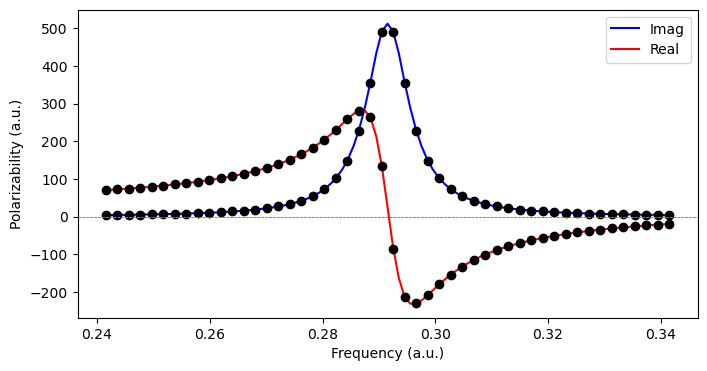

In [34]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

fig = plt.figure(1,figsize=(8,4))

x = np.arange(exc - 0.05, exc + 0.05, 0.001)
yR = interp1d(freqs, alpha_xx.real, kind = 'cubic')
yI = interp1d(freqs, alpha_xx.imag, kind = 'cubic')

plt.plot(x, yI(x), 'b-', x, yR(x), 'r-')
plt.plot(freqs, alpha_xx.real, 'ko', freqs, alpha_xx.imag, 'ko')

plt.legend(['Imag', 'Real'])

plt.axhline(y = 0, color = '0.5', linewidth = 0.7, dashes = [3,1,3,1])

plt.ylabel('Polarizability (a.u.)')
plt.xlabel('Frequency (a.u.)')

plt.show()